In [1062]:
import csv
import numpy as np
from numpy import std, mean
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Q 4.1

In [1063]:
def load_data(filename):
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        ans = []
        for line in reader:
            ans.append(line)
        return(ans)

In [1064]:
l =load_data("countries.csv")
l

[{'': '0',
  'Country': 'Afghanistan ',
  'Population': '31056997',
  'Net migration': '23.06',
  'GDP ($ per capita)': '700.0',
  'Literacy (%)': '36.0',
  'Phones (per 1000)': '3.2',
  'Infant mortality (per 1000 births)': '163.07'},
 {'': '1',
  'Country': 'Albania ',
  'Population': '3581655',
  'Net migration': '-4.93',
  'GDP ($ per capita)': '4500.0',
  'Literacy (%)': '86.5',
  'Phones (per 1000)': '71.2',
  'Infant mortality (per 1000 births)': '21.52'},
 {'': '2',
  'Country': 'Algeria ',
  'Population': '32930091',
  'Net migration': '-0.39',
  'GDP ($ per capita)': '6000.0',
  'Literacy (%)': '70.0',
  'Phones (per 1000)': '78.1',
  'Infant mortality (per 1000 births)': '31'},
 {'': '3',
  'Country': 'American Samoa ',
  'Population': '57794',
  'Net migration': '-20.71',
  'GDP ($ per capita)': '8000.0',
  'Literacy (%)': '97.0',
  'Phones (per 1000)': '259.5',
  'Infant mortality (per 1000 births)': '9.27'},
 {'': '4',
  'Country': 'Andorra ',
  'Population': '71201',
  '

# Q 4.2

In [1065]:
def calc_features(row):
    ans = []
    for i,j in row.items():
        if i == "" or i == "Country":
            continue
        else:
            ans.append(float(j))
    np.reshape(ans, (6,))
    ans = np.array(ans).astype("float64")
    return ans

In [1140]:
calc = []
calc.append(calc_features(l[0]))
calc.append(calc_features(l[1]))
calc.append(calc_features(l[2]))
calc.append(calc_features(l[3]))
calc.append(calc_features(l[4]))
calc.append(calc_features(l[5]))
calc

[array([3.1056997e+07, 2.3060000e+01, 7.0000000e+02, 3.6000000e+01,
        3.2000000e+00, 1.6307000e+02]),
 array([ 3.581655e+06, -4.930000e+00,  4.500000e+03,  8.650000e+01,
         7.120000e+01,  2.152000e+01]),
 array([ 3.2930091e+07, -3.9000000e-01,  6.0000000e+03,  7.0000000e+01,
         7.8100000e+01,  3.1000000e+01]),
 array([ 5.7794e+04, -2.0710e+01,  8.0000e+03,  9.7000e+01,  2.5950e+02,
         9.2700e+00]),
 array([7.1201e+04, 6.6000e+00, 1.9000e+04, 1.0000e+02, 4.9720e+02,
        4.0500e+00]),
 array([1.2127071e+07, 0.0000000e+00, 1.9000000e+03, 4.2000000e+01,
        7.8000000e+00, 1.9119000e+02])]

# Q 4.3

In [1138]:
def hac(features):
    #length(features)
    lenf = len(features)

    #the answer -> len(features)-1(num of paths), 4(we have to find 4 z)
    ans = np.zeros((lenf-1, 4))

    #Number each of your starting data points from 0 to n − 1
    numCon = {}
    for i in range(lenf):
        #value is the number of countries (처음에는 모두 1로 시작)
        numCon[i] = 1

    #find distance between two clusters
    distance = np.zeros((lenf, lenf))
    for i in range(lenf):
        for j in range(lenf):
            distance[i, j] = np.linalg.norm(features[i] - features[j])

    
    #find Z[i, 0], Z[i, 1], Z[i, 2], Z[i, 3] and put them into cList
    #path is length of features - 1 
    for i in range(lenf-1):
        #base case
        if len(numCon) <= 1:
            break

        #otherwise find the cloest distance between the clusters
        minDistance = np.inf #np.inf means positive infinity
        z0, z1 = 0, 0
        #numCon is a dictionary, thus we will use the key of the dictionary
        for first in numCon.keys():
            for second in numCon.keys():
                #distance cannot be 0 -> 0 means cluster itself
                if distance[first, second] != 0:
                    #if new value is lower than the minimum distance
                    if distance[int(first), int(second)] < minDistance:
                        z0, z1 = first, second
                        #initialize min distance to new distance
                        minDistance = distance[int(first), int(second)]

        #new cluster
        newC = []
        for c in range(lenf + i):
            #append the new cluster and the other clusters' max distance (complete-linkage)
            newC = np.append(newC, max(distance[z0, c], distance[z1, c]))
        #vstack -> stands for vertical stack [[1,2],[3,4]]
        distance = np.vstack((distance, newC))
        #0 is for distance of new cluster itself
        newC = np.append(newC, 0)
        newC = np.reshape(newC, (lenf + i + 1, 1))
        #hstack -> stands for horizontal stack [[1,2,3,4]]
        distance = np.hstack((distance, newC))
  
        # Z[i, 0] first element
        # Z[i, 1] second element  
        ans[i][0] = float(z0)
        ans[i][1] = float(z1)

        print("T",distance)
        # Z[i, 2] distance between the two clusters 
        ans[i][2] = float(distance[int(z0), int(z1)])
        # Z[i, 3] total number of countries
        z3 = numCon.pop(z0) + numCon.pop(z1)
        ans[i][3] = float(z3)
        numCon[lenf + i] = z3
    return ans
                    

    

In [1068]:
# def  hac(features):
#     #answer
#     cList = np.zeros((len(features)-1 , 4))

#     # Number each of features
#     startDataPoints = {}
#     for i in range(len(features)):
#         startDataPoints[i] = 1

#     #find distance between two clusters
#     distance = np.zeros((len(features), len(features)))
#     for i in range(len(features)):
#         for j in range(len(features)):
#             distance[i][j] = np.linalg.norm(features[i] - features[j])

#     #find Z[i, 0], Z[i, 1], Z[i, 2], Z[i, 3] and put them into cList
#     for i in range(len(features)-1):
#         #base case
#         if len(startDataPoints) <= 1:
#             break

#         newIdx = len(features) + i
#         #otherwise find the cloest distance between the clusters
#         minDistance = np.inf
#         z0, z1 = 0, 0
#         for first in startDataPoints.keys():
#             for second in startDataPoints.keys():
#                 if distance[int(first)][int(second)] != 0:
#                     #if new value is lower than the minimum distance
#                     if distance[int(first)][int(second)] < minDistance:
#                         minDistance = distance[int(first)][int(second)]
#                         #set the minimum values as z0 and z1 (z0 < z1)
#                         z0, z1 = float(first), float(second)
#                         #z2 is the distance between z0 and z1
#                         fCon = first
#                         sCon = second
                       
#         # Z[i, 0] first element
#         # Z[i, 1] second element       
#         cList[i][0] = z0
#         cList[i][1] = z1
           
#         # Create new row for new cluster and append to dist matrix
#         new_cluster = np.array([])
#         for clus in range(newIdx):
#             new_cluster = np.append(new_cluster, max(distance[int(first)][clus], distance[int(second)][clus]))
#         distance = np.vstack((distance, new_cluster))
#         new_cluster = np.append(new_cluster, 0)
#         new_cluster = np.reshape(new_cluster, (newIdx + 1, 1))
#         distance = np.hstack((distance, new_cluster))
        
#         # Z[i, 2] distance between the two clusters 
#         cList[i][2] = distance[int(first)][int(second)]

#         print(fCon, sCon)
#         # Z[i, 3] total number of countries
#         num_countries = startDataPoints.pop(fCon) + startDataPoints.pop(sCon)
#         cList[i][3] = num_countries
#         startDataPoints[newIdx] = num_countries
#         print("ss",startDataPoints)
        
#     return cList
                    
        
    


In [1141]:
hac(calc)

T [[0.00000000e+00 2.74753423e+07 1.87310150e+06 3.09992039e+07
  3.09858014e+07 1.89299260e+07 3.09992039e+07]
 [2.74753423e+07 0.00000000e+00 2.93484360e+07 3.52386274e+06
  3.51048397e+06 8.54541640e+06 3.52386274e+06]
 [1.87310150e+06 2.93484360e+07 0.00000000e+00 3.28722971e+07
  3.28588926e+07 2.08030204e+07 3.28722971e+07]
 [3.09992039e+07 3.52386274e+06 3.28722971e+07 0.00000000e+00
  1.73437289e+04 1.20692785e+07 1.73437289e+04]
 [3.09858014e+07 3.51048397e+06 3.28588926e+07 1.73437289e+04
  0.00000000e+00 1.20558821e+07 1.73437289e+04]
 [1.89299260e+07 8.54541640e+06 2.08030204e+07 1.20692785e+07
  1.20558821e+07 0.00000000e+00 1.20692785e+07]
 [3.09992039e+07 3.52386274e+06 3.28722971e+07 1.73437289e+04
  1.73437289e+04 1.20692785e+07 0.00000000e+00]]
T [[0.00000000e+00 2.74753423e+07 1.87310150e+06 3.09992039e+07
  3.09858014e+07 1.89299260e+07 3.09992039e+07 1.87310150e+06]
 [2.74753423e+07 0.00000000e+00 2.93484360e+07 3.52386274e+06
  3.51048397e+06 8.54541640e+06 3.5238

array([[3.00000000e+00, 4.00000000e+00, 1.73437289e+04, 2.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 1.87310150e+06, 2.00000000e+00],
       [1.00000000e+00, 6.00000000e+00, 3.52386274e+06, 3.00000000e+00],
       [5.00000000e+00, 8.00000000e+00, 1.20692785e+07, 4.00000000e+00],
       [7.00000000e+00, 9.00000000e+00, 3.28722971e+07, 6.00000000e+00]])

# Q 4.4

In [1102]:
def fig_hac(Z, names):
    fig = plt.figure()
    dendrogram(Z, labels=names, leaf_rotation = 90)
    fig.tight_layout()
    return plt

# Q 4.5

In [1123]:
def normalize_features(features):
    ans = []
    #axis = 0 -> horizontal(row) sum/ axis = 1 -> vertical(column) sum
    means = mean(features, axis=0)
    stds = std(features, axis=0)
    normalizeF = ((features- means)/stds)
    for i in normalizeF:
        ans.append(i)
    return ans

In [1095]:
normalize_features(calc)

[array([ 1.28408685,  1.71676808, -0.99412425, -1.42359015, -0.85068374,
         1.21389027]),
 array([-0.7032392 , -0.42317129, -0.36275843,  0.57802384, -0.46409545,
        -0.63264399]),
 array([ 1.4195701 , -0.07607144, -0.11353508, -0.07596885, -0.42486811,
        -0.50897642]),
 array([-0.9581245 , -1.62961085,  0.21876272,  0.99420101,  0.60641301,
        -0.79244649]),
 array([-0.95715475,  0.45834   ,  2.04640061,  1.11310877,  1.95776649,
        -0.86054193]),
 array([-0.08513851, -0.0462545 , -0.79474557, -1.18577463, -0.82453218,
         1.58071855])]

T [[0.00000000e+00 2.74753423e+07 1.87310150e+06 3.09992039e+07
  3.09858014e+07 1.89299260e+07 3.10435210e+07 3.09878907e+07
  8.86484222e+06 2.80806251e+07 3.09878907e+07]
 [2.74753423e+07 0.00000000e+00 2.93484360e+07 3.52386274e+06
  3.51048397e+06 8.54541640e+06 3.56818038e+06 3.51255305e+06
  3.63401786e+07 6.05283839e+05 3.51255305e+06]
 [1.87310150e+06 2.93484360e+07 0.00000000e+00 3.28722971e+07
  3.28588926e+07 2.08030204e+07 3.29166141e+07 3.28609834e+07
  6.99174394e+06 2.99537191e+07 3.28609834e+07]
 [3.09992039e+07 3.52386274e+06 3.28722971e+07 0.00000000e+00
  1.73437289e+04 1.20692785e+07 4.43215277e+04 1.17085997e+04
  3.98640391e+07 2.91858147e+06 1.73437289e+04]
 [3.09858014e+07 3.51048397e+06 3.28588926e+07 1.73437289e+04
  0.00000000e+00 1.20558821e+07 5.86534048e+04 8.26945871e+03
  3.98506328e+07 2.90521236e+06 8.26945871e+03]
 [1.89299260e+07 8.54541640e+06 2.08030204e+07 1.20692785e+07
  1.20558821e+07 0.00000000e+00 1.21135959e+07 1.20579664e+07
  2.77947636e+

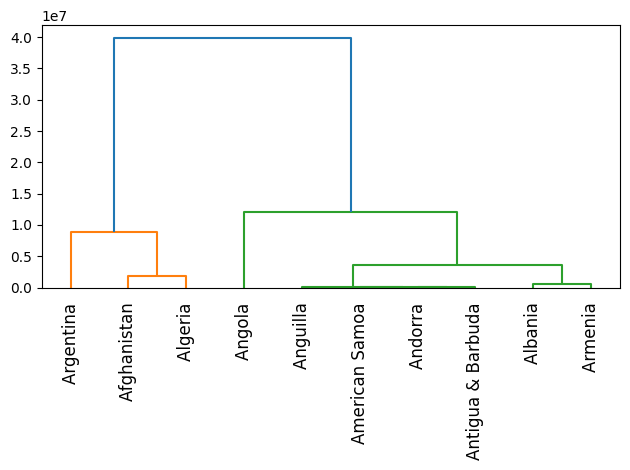

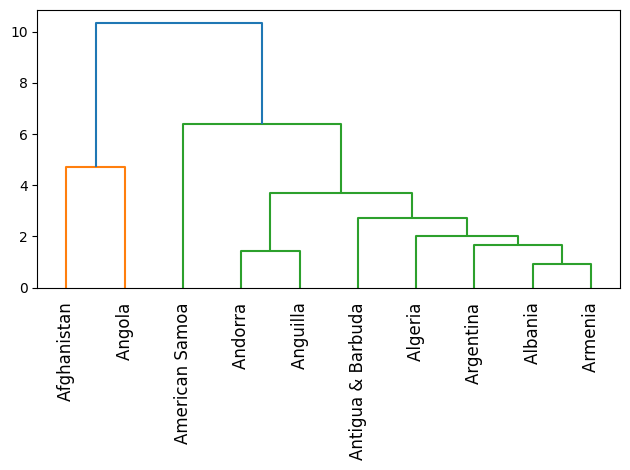

In [1146]:
data = load_data("countries.csv")
country_names = [row["Country"] for row in data]
features = [calc_features(row) for row in data]
features_normalized = normalize_features(features)
n = 10 
Z_raw = hac(features[:n])
Z_normalized = hac(features_normalized[:n])
fig = fig_hac(Z_raw, country_names[:n])
fig = fig_hac(Z_normalized, country_names[:n])
plt.show()

T [[0.00000000e+00 2.37835062e+08 5.71772229e+07 3.33020292e+07
  6.04002891e+07 3.48787255e+07 2.37938263e+07 3.91529742e+07
  4.91071504e+07 4.83723549e+07 4.91071504e+07]
 [2.37835062e+08 0.00000000e+00 2.95012284e+08 2.71137083e+08
  2.98235348e+08 2.72713782e+08 2.14041252e+08 2.76988029e+08
  2.86942207e+08 2.86207412e+08 2.86942207e+08]
 [5.71772229e+07 2.95012284e+08 0.00000000e+00 2.38752046e+07
  3.22307822e+06 2.22985044e+07 8.09710347e+07 1.80242600e+07
  8.07008693e+06 8.80487975e+06 8.80487975e+06]
 [3.33020292e+07 2.71137083e+08 2.38752046e+07 0.00000000e+00
  2.70982650e+07 1.57670205e+06 5.70958320e+07 5.85094607e+06
  1.58051240e+07 1.50703290e+07 1.58051240e+07]
 [6.04002891e+07 2.98235348e+08 3.22307822e+06 2.70982650e+07
  0.00000000e+00 2.55215661e+07 8.41940970e+07 2.12473191e+07
  1.12931412e+07 1.20279360e+07 1.20279360e+07]
 [3.48787255e+07 2.72713782e+08 2.22985044e+07 1.57670205e+06
  2.55215661e+07 0.00000000e+00 5.86725310e+07 4.27424887e+06
  1.42284256e+

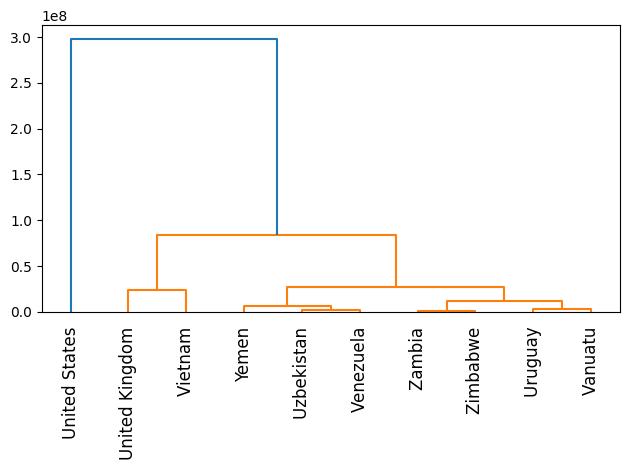

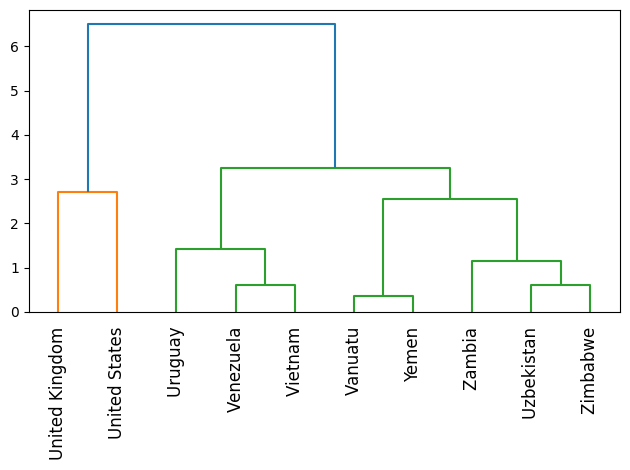

In [1147]:
data = load_data("countries.csv")
country_names = [row["Country"] for row in data]
features = [calc_features(row) for row in data]
features_normalized = normalize_features(features)
n = 10 

# Take the last n rows from the end
data_last_n = data[-n:]
features_last_n = features[-n:]
features_normalized_last_n = features_normalized[-n:]
country_names_last_n = country_names[-n:]

Z_raw = hac(features_last_n)
Z_normalized = hac(features_normalized_last_n)
fig = fig_hac(Z_raw, country_names_last_n)
fig = fig_hac(Z_normalized, country_names_last_n)
plt.show()